In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os


In [3]:
df = pd.read_csv(os.path.join("..", "Resources", "movies_complete_adjusted2.csv"))
df.head()

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Normalize
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,"With the aid of a wealthy erratic tippler, a d...",8.5,162668,1500000,19181,46008,99,295.0,122,17.027039
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,The Tramp struggles to live in modern industri...,8.5,211250,1500000,163577,457688,96,307.0,115,18.619496
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,...,A wanted gangster is both king and prisoner of...,7.7,6180,60000,155895,155895,98,46.0,55,17.972986
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,Exiled into the dangerous forest by her wicked...,7.6,177157,1499000,184925486,184925486,95,260.0,173,17.972986
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,A manipulative woman and a roguish man conduct...,8.1,283975,3977000,200852579,402352579,97,881.0,197,18.619496


In [4]:
# Adjusting for inflation
df['budget_1'] = df['budget'] * df['Normalize']
df['income_1'] = df['usa_gross_income'] * df['Normalize']
df.head()

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Normalize,budget_1,income_1
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,162668,1500000,19181,46008,99,295.0,122,17.027039,2.554056e+07,3.265956e+05
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,211250,1500000,163577,457688,96,307.0,115,18.619496,2.792924e+07,3.045721e+06
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,...,6180,60000,155895,155895,98,46.0,55,17.972986,1.078379e+06,2.801899e+06
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,177157,1499000,184925486,184925486,95,260.0,173,17.972986,2.694151e+07,3.323663e+09
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,283975,3977000,200852579,402352579,97,881.0,197,18.619496,7.404974e+07,3.739774e+09


In [5]:
# Converting the budget and income to log values
df['log_budget'] = np.log(df['budget_1'])
df['log_income'] = np.log(df['income_1'])
df.head()

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,Normalize,budget_1,income_1,log_budget,log_income
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,19181,46008,99,295.0,122,17.027039,2.554056e+07,3.265956e+05,17.055778,12.696478
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,163577,457688,96,307.0,115,18.619496,2.792924e+07,3.045721e+06,17.145185,14.929248
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,...,155895,155895,98,46.0,55,17.972986,1.078379e+06,2.801899e+06,13.890970,14.845808
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,184925486,184925486,95,260.0,173,17.972986,2.694151e+07,3.323663e+09,17.109179,21.924333
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,200852579,402352579,97,881.0,197,18.619496,7.404974e+07,3.739774e+09,18.120248,22.042291


In [6]:
df_1 = pd.concat([df,df.genre.str.get_dummies(sep=', ')],1)
df_1.head()

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,0,0,0,0,1,0,0,0,0,0
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,0,0,0,0,0,0,0,0,0,0
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,...,0,0,0,0,1,0,0,0,0,0
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,0,0,0,0,0,0,0,0,0,0
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#List the columns
list(df_1)

#df_1.to_excel("output.xlsx")  

['imdb_title_id',
 'original_title',
 'year',
 'genre',
 'duration',
 'country',
 'language',
 'director',
 'writer',
 'production_company',
 'actors',
 'description',
 'avg_vote',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'metascore',
 'reviews_from_users',
 'reviews_from_critics',
 'Normalize',
 'budget_1',
 'income_1',
 'log_budget',
 'log_income',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [8]:
# Working on language, the first one is the primary language, hence we are keeping only the first one for simplicity
# splitting at occurrence of whitespace 
df_1["lang"]= df_1["language"].str.split(",").str[0] 

# displaying first element from list 
#df_1["language"].str.get(0) 
df_1.head()
 

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,lang
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,0,0,0,1,0,0,0,0,0,English
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,0,0,0,0,0,0,0,0,0,English
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,...,0,0,0,1,0,0,0,0,0,French
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,0,0,0,0,0,0,0,0,0,English
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,0,0,0,1,0,0,0,0,0,English


In [9]:
#Count movies in each of the languages so that we can choose a few languages
df_1.groupby(['lang']).size()

lang
Aboriginal                   1
Afrikaans                    2
American Sign Language       1
Arabic                      13
Aramaic                      1
Bosnian                      1
Cantonese                   15
Chechen                      1
Chinese                      1
Czech                        2
Danish                       4
Dari                         1
Dutch                        1
Dzongkha                     1
English                   5773
Filipino                     2
French                      49
German                       2
Greek                        2
Hebrew                       6
Hindi                        9
Hungarian                    1
Icelandic                    2
Indonesian                   2
Italian                     14
Japanese                    30
Kazakh                       1
Korean                      19
Latin                        1
Mandarin                    39
Maya                         1
Mongolian                    1
Non

In [11]:
# Include popular language movies only
df_2 = df_1.loc[df_1['lang'].isin(['English','French', 'Japanese', 'Mandarin', 'Spanish', 'Korean'])]
df_2.head()

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,lang
0,tt0021749,City Lights,1931,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,0,0,0,1,0,0,0,0,0,English
1,tt0027977,Modern Times,1936,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,...,0,0,0,0,0,0,0,0,0,English
2,tt0029453,Pépé le Moko,1937,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,...,0,0,0,1,0,0,0,0,0,French
3,tt0029583,Snow White and the Seven Dwarfs,1937,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,...,0,0,0,0,0,0,0,0,0,English
4,tt0031381,Gone with the Wind,1939,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,...,0,0,0,1,0,0,0,0,0,English


In [12]:
data = df_2[[ "Action", 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
 "lang", "log_budget", "log_income"]]
X = data.drop(['log_income'], axis=1)
y = data["log_income"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5961, 16) (5961, 1)


In [13]:
# One hot encoding for the categorical variables to convert to numeric values 
#from sklearn.preprocessing import OneHotEncoder


In [14]:
# Dummy encoding
X = pd.get_dummies(X)
X.head()


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,...,Romance,Sci-Fi,Thriller,log_budget,lang_English,lang_French,lang_Japanese,lang_Korean,lang_Mandarin,lang_Spanish
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,17.055778,1,0,0,0,0,0
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,17.145185,1,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,1,0,0,13.890970,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,1,0,...,0,0,0,17.109179,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,18.120248,1,0,0,0,0,0


In [15]:
list(X)

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'log_budget',
 'lang_English',
 'lang_French',
 'lang_Japanese',
 'lang_Korean',
 'lang_Mandarin',
 'lang_Spanish']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,...,Romance,Sci-Fi,Thriller,log_budget,lang_English,lang_French,lang_Japanese,lang_Korean,lang_Mandarin,lang_Spanish
5805,1,1,0,0,0,0,1,0,0,0,...,0,0,0,18.390746,1,0,0,0,0,0
1320,0,1,0,1,0,0,1,0,0,0,...,0,0,0,17.677304,1,0,0,0,0,0
2777,1,0,0,0,0,1,1,0,0,0,...,0,0,0,18.048316,1,0,0,0,0,0
2975,0,0,0,0,1,0,1,0,0,0,...,1,0,0,16.902980,1,0,0,0,0,0
5397,0,0,0,0,1,1,0,0,0,0,...,0,0,0,17.592356,1,0,0,0,0,0


In [17]:
#Fitting the Standard scaler model to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

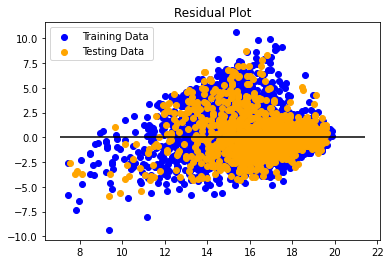

In [19]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [20]:
# Quantify the model by Calculating the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = model.score(X_test_scaled, y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 3.594667926589879
R-squared (R2 ): 0.45980825842914474


In [21]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.45827931187143345
Testing Data Score: 0.45980825842914474


In [22]:
#Saving the model
import joblib
filename = 'workin_model_liner.sav'
joblib.dump(model, filename)


['workin_model_liner.sav']

In [23]:
#Saving the scaler
import joblib
filename = "Scaler.sav"
joblib.dump(X_scaler, filename)

['Scaler.sav']